# MDS Cities

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Interactive magics - comment out if running from another script
%matplotlib inline
%qtconsole

In [2]:
print(__doc__)
import numpy as np

from matplotlib import pyplot as plt

from sklearn import manifold
from sklearn.metrics import euclidean_distances

import scipy.io
import pandas as pd
import numpy as np

Automatically created module for IPython interactive environment


## Carga de datos de ciudades y Preparacion a Matriz de Distancias

In [3]:
CIUDADES = ['Azul',
           'B.Blanca',
           'Bs. As.',
           'C. Rivadavia',
           'C. Uruguay',
           'Concordia',
           'Cordoba',
           'Corrientes',
           'Chivilcoy',
           'Formosa',
           'Gral Roca',
           'Goya',
           'Gualeg.',
           'Junin',
           'La Plata',
           'La Rioja',
           'Mar del Plata',
           'Mendoza',
           'Necochea',
           'Neuquén']

In [4]:
matriz = """0,344,303,1446,598,726,859,1228,240,1340,835,1020,528,312,289,1376,269,1100,249,875
344,0,647,1102,919,1070,947,1474,594,1624,491,1306,844,551,639,1408,461,1118,336,531
303,647,0,1720,303,437,711,933,158,1181,1138,725,233,267,60,1167,404,1080,534,1178
1446,1102,1720,0,2013,2164,1845,2576,1630,2726,1076,2408,1946,1653,1740,2294,1563,1990,1393,1116
598,919,303,2013,0,151,628,630,353,838,1330,512,76,465,360,1088,707,1220,837,1370
726,1070,437,2164,151,0,627,501,485,708,1460,382,206,597,490,1087,837,1119,967,1500
859,947,711,1845,628,627,0,900,658,1048,1113,702,659,547,768,460,1115,680,1152,1153
1228,1474,933,2576,630,501,900,0,978,190,1873,231,696,925,990,1024,1337,1490,1467,1913
240,594,158,1630,353,485,658,978,0,1146,943,785,293,106,215,1118,509,919,520,983
1340,1624,1181,2726,838,708,1048,190,1146,0,2073,419,904,1093,1238,1175,1585,1634,1716,2081
835,491,1138,1076,1330,1460,1113,1873,943,2073,0,1715,1260,943,1119,1464,952,855,842,40
1020,1306,725,2408,512,382,702,231,785,419,1715,0,582,897,782,1255,1129,1302,1259,1755
528,844,233,1946,76,206,659,696,293,904,1260,582,0,405,290,1119,637,1202,767,1300
312,551,267,1653,465,597,547,925,106,1093,943,897,405,0,324,1007,590,813,592,983
289,639,60,1740,360,490,768,990,215,1238,1119,782,290,324,0,1224,355,1137,488,1159
1376,1408,1167,2294,1088,1087,460,1024,1118,1175,1464,1255,1119,1007,1224,0,1575,612,1616,1427
269,461,404,1563,707,837,1115,1337,509,1585,952,1129,637,590,355,1575,0,1369,130,992
1100,1118,1080,1990,1220,1119,680,1490,919,1634,855,1302,1202,813,1137,612,1369,0,1349,815
249,336,534,1393,837,967,1152,1467,520,1716,842,1259,767,592,488,1616,130,1349,0,862
875,531,1178,1116,1370,1500,1153,1913,983,2081,40,1755,1300,983,1159,1427,992,815,862,0"""

In [5]:
matriz = np.array([[int(n) for n in line.split(',')] for line in matriz.split("\n")])

In [6]:
matriz.shape

(20, 20)

## Aplicando MDS

Aplicamos MDS con sklearn sobre la matriz de distancias obtenida.

In [7]:
# indicamos que queremos dos componentes
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(matriz).embedding_
pos

array([[ -326.13995055,   -10.97293825],
       [ -449.97325939,   314.60983453],
       [ -121.81359358,  -226.7679125 ],
       [-1329.16457736,  1014.98410054],
       [  112.020828  ,  -406.22663586],
       [  242.70477793,  -463.9133185 ],
       [  500.16170592,   115.78304716],
       [  661.77926577,  -720.88780039],
       [  -67.74867625,   -77.93745672],
       [  815.81723678,  -845.67261607],
       [ -356.64077514,   836.98244922],
       [  453.86877366,  -686.73680488],
       [   50.6731725 ,  -367.21028486],
       [    5.99420432,    12.75102056],
       [ -186.48217696,  -243.03289226],
       [  957.10624019,   320.55680441],
       [ -544.11877362,  -149.05304082],
       [  514.86531511,   704.62831059],
       [ -603.19548347,    -2.58627545],
       [ -329.71425386,   880.70240953]])

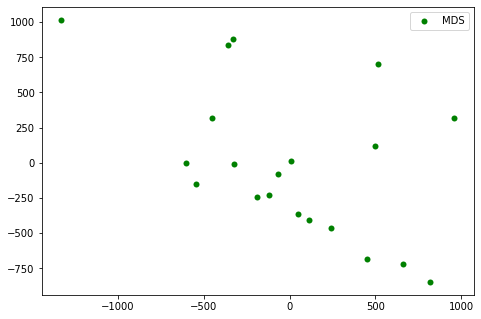

In [8]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(pos[:, 0], pos[:, 1], color='green', lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

plt.show()

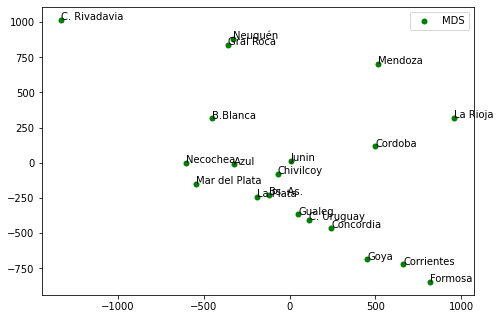

In [9]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(pos[:, 0], pos[:, 1], color='green', lw=0, label='MDS')
for i, txt in enumerate(CIUDADES):
    ax.annotate(txt, (pos[i,0], pos[i,1]))
plt.legend(scatterpoints=1, loc='best', shadow=False)

plt.show()

Tener en cuenta que las coordenadas que nos devuelve MDS pueden estar espejadas y rotadas respecto de la realidad, ya que las distances en todos los casos son las mismas, pero nos facilita el analisis de las mismas.